In [23]:
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes2.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop(columns='Outcome')
y = df['Outcome']

In [65]:
list(y).count(0), list(y).count(1)

(500, 268)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [115]:
lam = tf.keras.regularizers.l2(l=0)
init = tf.initializers.he_normal()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, input_dim=8, kernel_initializer=init, kernel_regularizer=lam),
    tf.keras.layers.ReLU(),
    # tf.keras.layers.Dropout(0.2),

    # tf.keras.layers.Dense(32, kernel_initializer=init, kernel_regularizer=lam),
    # tf.keras.layers.ReLU(),
    # # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 8)                 72        
_________________________________________________________________
re_lu_19 (ReLU)              (None, 8)                 0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [116]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.001)
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [117]:
class_weights = {
    0 : 0.5,
    1 : 1.5
}

In [118]:
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1, shuffle=True, callbacks=[reduce_lr], class_weight=class_weights)

Epoch 1/20
35/35 [==============================] - 1s 9ms/step - loss: 0.6215 - accuracy: 0.4323 - val_loss: 0.8380 - val_accuracy: 0.4194
Epoch 2/20
35/35 [==============================] - 0s 5ms/step - loss: 0.5120 - accuracy: 0.4980 - val_loss: 0.7495 - val_accuracy: 0.5645
Epoch 3/20
35/35 [==============================] - 0s 7ms/step - loss: 0.4886 - accuracy: 0.6175 - val_loss: 0.7076 - val_accuracy: 0.5968
Epoch 4/20
35/35 [==============================] - 0s 6ms/step - loss: 0.4522 - accuracy: 0.6681 - val_loss: 0.6974 - val_accuracy: 0.6290
Epoch 5/20
35/35 [==============================] - 0s 6ms/step - loss: 0.4403 - accuracy: 0.7092 - val_loss: 0.6590 - val_accuracy: 0.6774
Epoch 6/20
35/35 [==============================] - 0s 6ms/step - loss: 0.4190 - accuracy: 0.6932 - val_loss: 0.6758 - val_accuracy: 0.6290
Epoch 7/20
35/35 [==============================] - 0s 7ms/step - loss: 0.4229 - accuracy: 0.7011 - val_loss: 0.6325 - val_accuracy: 0.6935
Epoch 8/20
35/35 [==

In [119]:
y_pred = model.predict(X_test)

In [120]:
pred = []
for i in range(len(y_pred)):
    if y_pred[i] < 0.5:
        pred.append(0)
    else:
        pred.append(1)

In [121]:
from sklearn.metrics import accuracy_score, confusion_matrix
a = accuracy_score(pred, y_test)
print('Accuracy is:', a*100)

Accuracy is: 77.92207792207793


<AxesSubplot:>

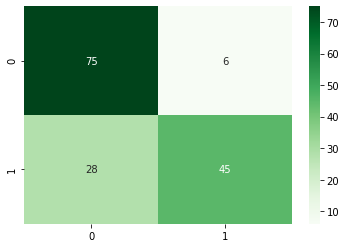

In [122]:
sns.heatmap(confusion_matrix(pred, y_test), annot=True, fmt='g', cmap='Greens')

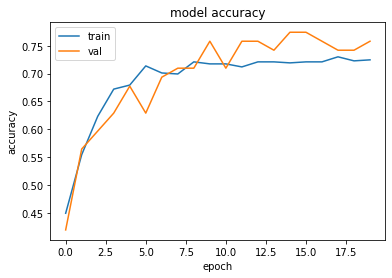

In [123]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

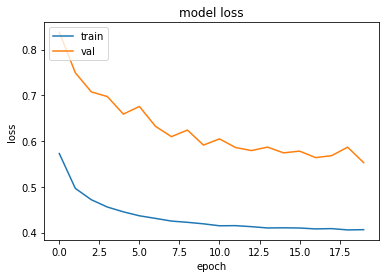

In [124]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()